# Graded Challenge 3 Phase 1

Holla.. Irpan Habibi's here from Batch 004 Hacktiv8's Fulltime Data Science Programs

In this kernel, I implement Random Forest with Python and Scikit-Learn and build a classifier to predict Death Event on Heart Failure Cases . We train a binary classification model using Random Forest Classifier and Boosting Classifier. 

So, let's get started.


***ii. Import Libraries***

*The first step in building the model is to import the necessary libraries.*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from time import time
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from time import time
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

***iii. Loading Data***

*Preview the dataset*

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

**About the dataset**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Variable Description**
- **age** : the age of the person with heart failure

- **anaemia** : Decrease of red blood cells or hemoglobin (boolean)

- **creatinine_phosphokinase** : Level of the CPK enzyme in the blood (mcg/L)

- **diabetes** : If the patient has diabetes (boolean)

- **ejection_fraction** : Percentage of blood leaving the heart at each contraction (percentage)

- **high_blood_pressure** : If the patient has hypertension (boolean)

- **platelets** : Platelets in the blood (kiloplatelets/mL)

- **serum_creatinine** : Level of serum creatinine in the blood (mg/dL)

- **serum_sodium** : Level of serum sodium in the blood (mEq/L)

- **sex** : Woman or man (binary)

- **smoking** : If the patient smokes or not (boolean)

- **time** : Follow-up period (days)

- **DEATH_EVENT** : If the patient deceased during the follow-up period (boolean)

In [3]:
df.sample(8)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
203,60.0,0,59,0,25,1,212000.0,3.5,136,1,1,187,0
215,73.0,0,582,0,35,1,203000.0,1.3,134,1,0,195,0
107,45.0,1,1876,1,35,0,226000.0,0.9,138,1,0,88,0
244,54.0,0,582,1,38,0,264000.0,1.8,134,1,0,213,0
242,40.0,0,90,0,35,0,255000.0,1.1,136,1,1,212,0
217,54.0,1,427,0,70,1,151000.0,9.0,137,0,0,196,1
150,72.0,0,233,0,45,1,235000.0,2.5,135,0,0,115,1
187,60.0,0,1896,1,25,0,365000.0,2.1,144,0,0,172,1


*View summary of dataset*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


*View statistical properties of dataset*

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


***iv. Data Cleaning***

*Checking missing value on dataset*

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.shape

(299, 13)

In [8]:
df = df.rename(columns = {'DEATH_EVENT':'death_event'})

***v. Exploratory Data Analysis***

*We have imported the data. Now, its time to explore the data to gain insights about it.*

In [9]:
df.shape

(299, 13)

In [10]:
col_names = df.columns
col_names

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

**Univariate Analysis**

*Explore Target variable*

In [11]:
df['death_event'].isnull().sum()

0

In [12]:
df['death_event'].value_counts()

0    203
1     96
Name: death_event, dtype: int64

In [13]:
print('frequency distribution of Death Event is :\n',df['death_event'].value_counts())
print('Percentage of frequency distribution of Death Event is :\n',df['death_event'].value_counts()/len(df))

frequency distribution of Death Event is :
 0    203
1     96
Name: death_event, dtype: int64
Percentage of frequency distribution of Death Event is :
 0    0.67893
1    0.32107
Name: death_event, dtype: float64


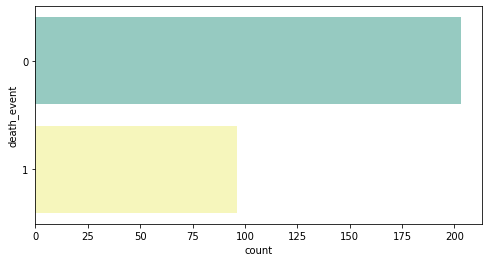

In [14]:
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y='death_event', data=df, palette="Set3")
plt.show()

**Multivariate Analysis**

*Explore other feature from dataset, include distribution and correlation*

In [15]:
#checking distribution
print(round(df.describe()))

         age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
count  299.0    299.0                     299.0     299.0              299.0   
mean    61.0      0.0                     582.0       0.0               38.0   
std     12.0      0.0                     970.0       0.0               12.0   
min     40.0      0.0                      23.0       0.0               14.0   
25%     51.0      0.0                     116.0       0.0               30.0   
50%     60.0      0.0                     250.0       0.0               38.0   
75%     70.0      1.0                     582.0       1.0               45.0   
max     95.0      1.0                    7861.0       1.0               80.0   

       high_blood_pressure  platelets  serum_creatinine  serum_sodium    sex  \
count                299.0      299.0             299.0         299.0  299.0   
mean                   0.0   263358.0               1.0         137.0    1.0   
std                    0.0    97804.0  

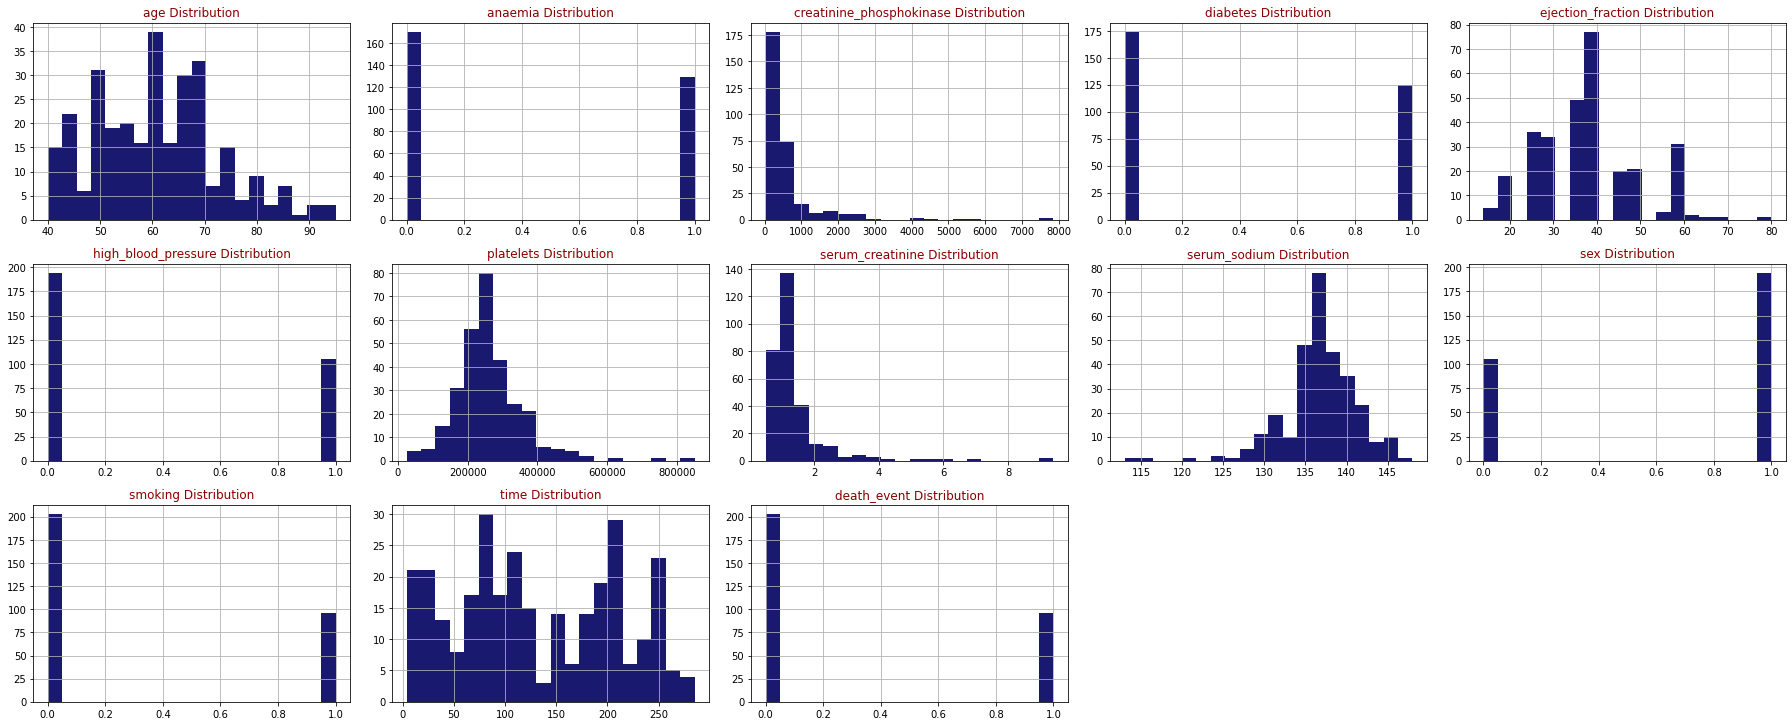

In [16]:
#visualizing distribution 
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(25,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,5)

In [17]:
#view mean from grouping by target
df.groupby('death_event').mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
death_event,,,,,,,,,,,,
0,58.761906,0.408867,540.054187,0.418719,40.26601,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123,158.339901
1,65.215281,0.479167,670.197917,0.416667,33.46875,0.406250,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417


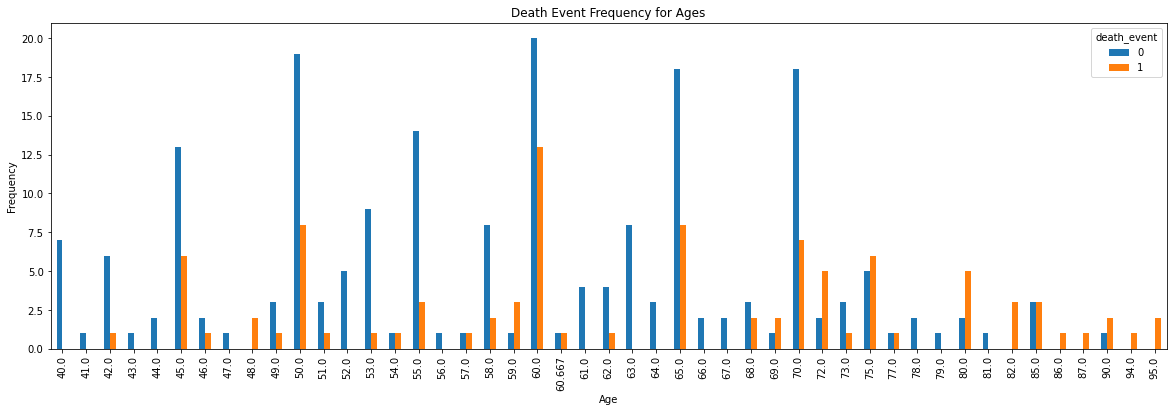

In [18]:
#shows death event freq for Ages
pd.crosstab(df.age,df.death_event).plot(kind="bar",figsize=(20,6))
plt.title('Death Event Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('DeathEventandAges.png')
plt.show()

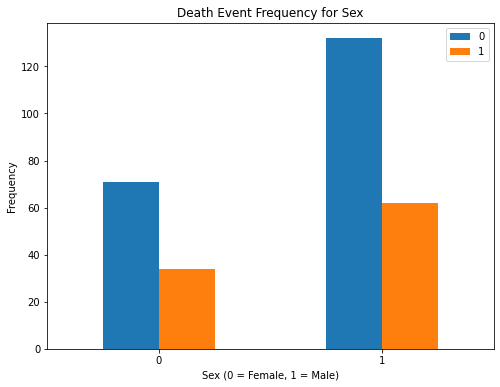

In [19]:
#Shows death event freq for Sex
pd.crosstab(df.sex,df.death_event).plot(kind="bar",figsize=(8,6))
plt.title('Death Event Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["0", "1"])
plt.ylabel('Frequency')

plt.show()

In [20]:
#view correlation between target and feature variable
corr_matrix = df.corr()
corr_matrix['death_event'].sort_values(ascending=False)

death_event                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: death_event, dtype: float64

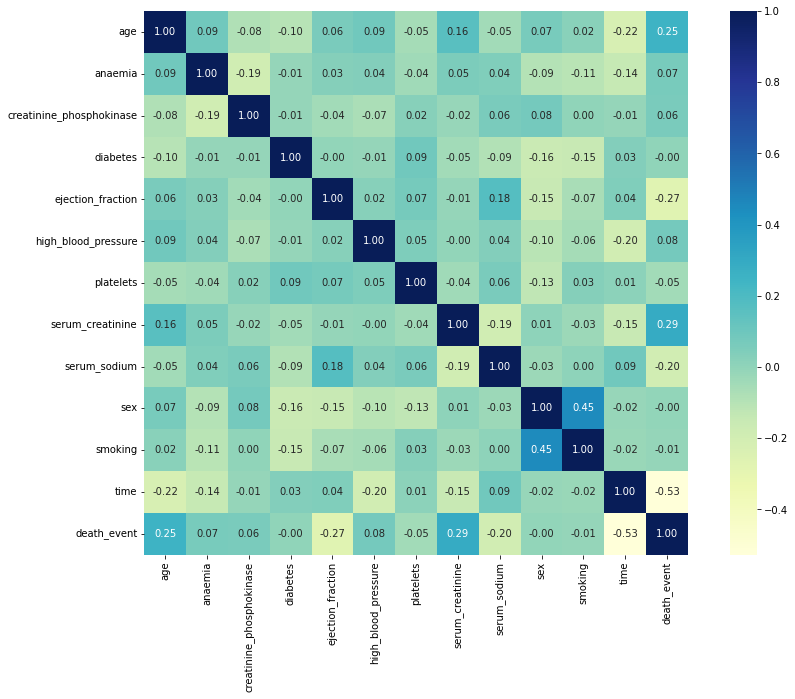

In [21]:
#visualizing correlation
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, square=True, fmt='.2f', cmap="YlGnBu")
plt.show()

In [22]:
threshold = 0.2 
filtre = np.abs(corr_matrix["death_event"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()

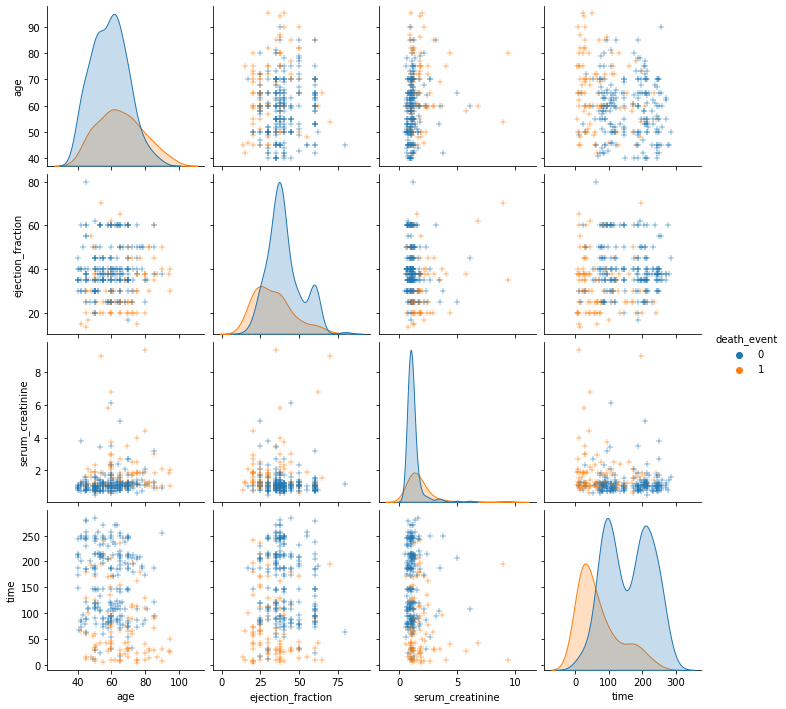

In [23]:
sns.pairplot(data=df[corr_features], diag_kind = "kde", markers = "+", hue = "death_event")
plt.show()

***vi. Data Preprocessing***

In [24]:
#Declare feature vector and target variable 
X = df.drop(['death_event'], axis=1)

y = df['death_event']

In [25]:
X.shape, y.shape

((299, 12), (299,))

In [26]:
#split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [27]:
X_train.shape, X_test.shape

((239, 12), (60, 12))

In [28]:
#check stratify value

y_test.value_counts()

0    41
1    19
Name: death_event, dtype: int64

In [29]:
#feature scaling

scaler = StandardScaler()

cols = X_train.columns

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [30]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [31]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [32]:
X_train.sample(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
206,-0.093917,1.110696,0.149676,1.110696,0.176528,1.298227,0.648468,-0.176407,-2.383666,0.749728,-0.682831,-0.467847
52,-0.969582,1.110696,-0.476906,1.110696,0.176528,-0.770281,-0.037001,-0.636482,-1.477949,0.749728,-0.682831,0.617238
84,-0.093917,1.110696,1.661194,1.110696,0.176528,-0.770281,0.194849,-0.360437,1.012774,-1.333818,-0.682831,0.772250


***vii. Model Building***

***vii(a) Model Training-Random Forest Classifier***

In [33]:
t0 = time()
model_rnd = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
model_rnd.fit(X_train,y_train)
y_pred=model_rnd.predict(X_test)

In [34]:
print('Time for training model with Random Forest:{0:0.4f}'.format(time() - t0), 'second')

Time for training model with Random Forest:0.6902 second


In [35]:
y_pred.shape

(60,)

***viii(a). Model Evaluation-Random Forest Classifier***

In [36]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8333


In [37]:
y_pred_train = model_rnd.predict(X_train)

In [38]:
print('Training set score: {:.4f}'.format(model_rnd.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model_rnd.score(X_test, y_test)))

Training set score: 0.9456
Test set score: 0.8333


In [39]:
cm = confusion_matrix(y_test, y_pred)

print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  38

True Negatives(TN) =  12

False Positives(FP) =  3

False Negatives(FN) =  7


<AxesSubplot:>

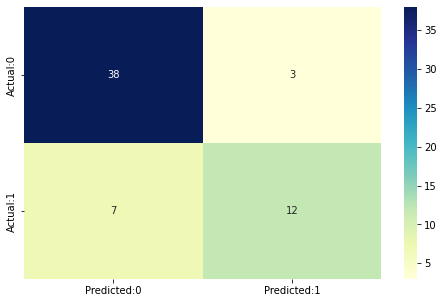

In [40]:
#visualizing confussion Matrix
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [41]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60



In [42]:
#Classification Accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [43]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8333


In [44]:
#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1667


***ix(a).Model Inference-Random Forest Classifier***

In [45]:
X.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7


In [46]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [48]:
new_data = [{'age':54,
              'anaemia':0,
              'creatinine_phosphokinase':356,
              'diabetes':0,
              'ejection_fraction':12,
              'high_blood_pressure':0,
              'platelets':230000,
              'serum_creatinine':2.7,
              'serum_sodium':15,
              'sex':1,
              'smoking':0,
              'time':6}
             ]
new_data = pd.DataFrame(new_data,index=[1])
new_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
1,54,0,356,0,12,0,230000,2.7,15,1,0,6


In [52]:
new_sample = scaler.transform(new_data)
new_sample = pd.DataFrame(new_sample,index=[1],columns = [cols])
new_sample

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
1,-0.619316,-0.900337,-0.244289,-0.900337,-2.162728,-0.770281,-0.339414,1.203818,-27.517323,0.749728,-0.682831,-1.56585


In [53]:
new_pred = model_rnd.predict(new_sample)
new_pred

array([1])

***vii(b). Model Training-Boosting Classifier***

In [54]:
t0 = time()
model_adb = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5, 
    random_state=42
)
model_adb.fit(X_train,y_train)
y_pred=model_adb.predict(X_test)

In [55]:
print('Time for training model with Random Forest:{0:0.4f}'.format(time() - t0), 'second')

Time for training model with Random Forest:0.4393 second


In [56]:
y_pred.shape

(60,)

***viii(a). Model Evaluation-Boosting Classifier***

In [57]:
print('Test set score: {:.4f}'.format(model_adb.score(X_test, y_test)))

Test set score: 0.8333


In [58]:
cm = confusion_matrix(y_test, y_pred)

print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  39

True Negatives(TN) =  11

False Positives(FP) =  2

False Negatives(FN) =  8


<AxesSubplot:>

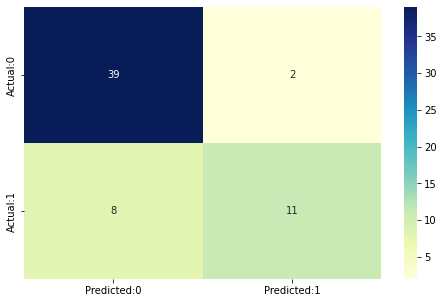

In [59]:
#visualizing confussion Matrix
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [60]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        41
           1       0.85      0.58      0.69        19

    accuracy                           0.83        60
   macro avg       0.84      0.77      0.79        60
weighted avg       0.83      0.83      0.82        60



In [61]:
#Classification Accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [62]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8333


In [63]:
#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1667


***ix(a).Model Inference-Random Forest Classifier***

In [64]:
new_sample

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
1,-0.619316,-0.900337,-0.244289,-0.900337,-2.162728,-0.770281,-0.339414,1.203818,-27.517323,0.749728,-0.682831,-1.56585


In [65]:
new_pred = model_adb.predict(new_sample)
new_pred

array([1])

By using new sample for predict Death Event shows the result 1, its mean Yes.

***x. Conclussion***

Making the model using Random forest and adaboostc is done to predict death events in the case of heart failure. Both of these models have almost the same accuracy of 0.83. However, the confusion matrix shows different results. This shows that these two classifier models are good for predicting death events in cases of heart failure.

